In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix,
    mean_squared_error, r2_score
)

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("customer_churn_ml.csv")
df.head() 


,customer_id,age,gender,tenure_months,monthly_charges,total_charges,contract_type,payment_method,internet_service,support_tickets,churn,lifetime_value
0,1,45,Male,12,70.5,846,Month-to-month,Credit Card,Fiber,3,1,1200
1,2,34,Female,48,55.2,2649,Two year,Bank Transfer,DSL,0,0,6800
2,3,29,Female,5,89.1,445,Month-to-month,Electronic Check,Fiber,5,1,900
3,4,62,Male,72,40.3,2901,Two year,Credit Card,NaN,1,0,8200
4,5,51,Female,24,65.0,1560,One year,Debit Card,DSL,2,0,4100


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       200 non-null    int64  
 1   age               200 non-null    int64  
 2   gender            200 non-null    object 
 3   tenure_months     200 non-null    int64  
 4   monthly_charges   200 non-null    float64
 5   total_charges     200 non-null    int64  
 6   contract_type     200 non-null    object 
 7   payment_method    200 non-null    object 
 8   internet_service  144 non-null    object 
 9   support_tickets   200 non-null    int64  
 10  churn             200 non-null    int64  
 11  lifetime_value    200 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 18.9+ KB


In [4]:
df.describe()


,customer_id,age,tenure_months,monthly_charges,total_charges,support_tickets,churn,lifetime_value
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,44.325000,32.475000,67.389000,1687.645000,2.340000,0.385000,4333.600000
std,57.879185,11.957184,25.591876,20.507392,982.520724,2.079911,0.487816,2875.820711
min,1.000000,24.000000,1.000000,38.600000,98.000000,0.000000,0.000000,500.000000
25%,50.750000,34.000000,10.000000,45.050000,761.750000,1.000000,0.000000,1350.000000
50%,100.500000,44.000000,25.000000,67.350000,1692.000000,2.000000,0.000000,4325.000000
75%,150.250000,55.000000,60.000000,85.425000,2688.000000,4.000000,1.000000,7525.000000
max,200.000000,65.000000,75.000000,100.200000,3522.000000,6.000000,1.000000,8450.000000


In [5]:
df.isnull().sum()


customer_id          0
age                  0
gender               0
tenure_months        0
monthly_charges      0
total_charges        0
contract_type        0
payment_method       0
internet_service    56
support_tickets      0
churn                0
lifetime_value       0
dtype: int64

In [8]:
import pandas as pd
df = pd.read_csv("customer_churn_ml.csv")


In [5]:
# Create new features
df["avg_monthly_spend"] = df["total_charges"] / (df["tenure_months"] + 1)
df["tickets_per_month"] = df["support_tickets"] / (df["tenure_months"] + 1)


In [6]:
df[["avg_monthly_spend", "tickets_per_month"]].head()


,avg_monthly_spend,tickets_per_month
0,65.076923,0.230769
1,54.061224,0.000000
2,74.166667,0.833333
3,39.739726,0.013699
4,62.400000,0.080000


In [23]:
X = df.drop(["customer_id", "churn", "lifetime_value"], axis=1)
y_class = df["churn"]
y_reg = df["lifetime_value"]

num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(drop="first"), cat_features)
])


In [10]:
X.head()


,age,gender,tenure_months,monthly_charges,total_charges,contract_type,payment_method,internet_service,support_tickets
0,45,Male,12,70.5,846,Month-to-month,Credit Card,Fiber,3
1,34,Female,48,55.2,2649,Two year,Bank Transfer,DSL,0
2,29,Female,5,89.1,445,Month-to-month,Electronic Check,Fiber,5
3,62,Male,72,40.3,2901,Two year,Credit Card,NaN,1
4,51,Female,24,65.0,1560,One year,Debit Card,DSL,2


In [13]:
y_class.head()


0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [16]:
y_reg.head()


0    1200
1    6800
2     900
3    8200
4    4100
Name: lifetime_value, dtype: int64

In [18]:
print(num_features)


Index(['age', 'tenure_months', 'monthly_charges', 'total_charges',
       'support_tickets'],
      dtype='object')


In [24]:
preprocessor


,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [25]:
X_transformed = preprocessor.fit_transform(X)


In [26]:
X_transformed.shape


(200, 17)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

results = {}

for name, model in models_class.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "F1": f1_score(y_test, preds)
    }

pd.DataFrame(results).T


,Accuracy,F1
Logistic Regression,1.0,1.0
Random Forest,1.0,1.0
XGBoost,1.0,1.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "XGBoost": XGBRegressor()
}

reg_results = {}

for name, model in models_reg.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    reg_results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

pd.DataFrame(reg_results).T


,RMSE,R2
Linear Regression,102.380613,0.998767
Random Forest,93.933836,0.998962
XGBoost,134.751413,0.997865


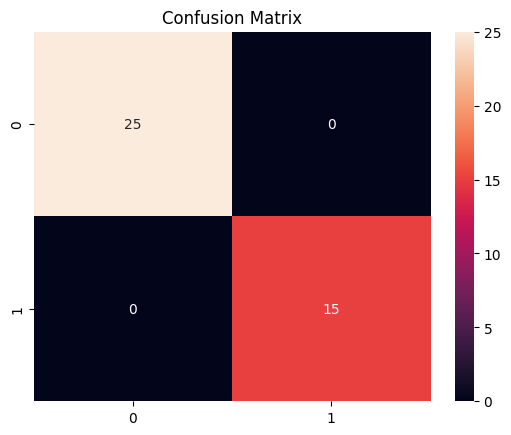

In [10]:
best_model = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200))
])

best_model.fit(X_train, y_class.loc[X_train.index])
preds = best_model.predict(X_test)

cm = confusion_matrix(y_class.loc[X_test.index], preds)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()


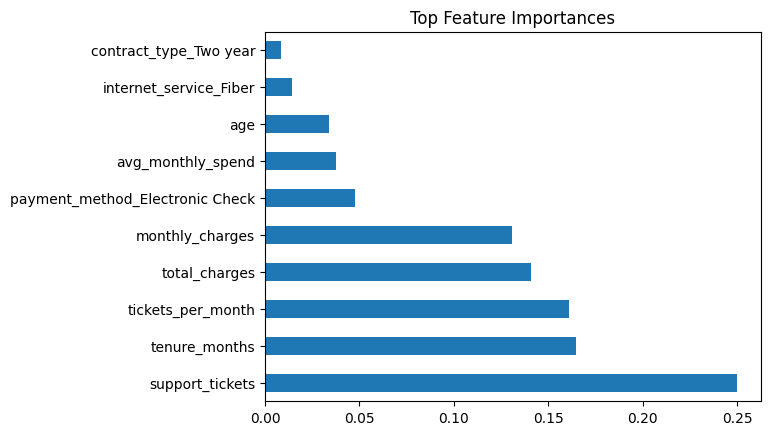

In [11]:
feature_names = (
    num_features.tolist() +
    list(best_model.named_steps["prep"]
         .named_transformers_["cat"]
         .get_feature_names_out(cat_features))
)

importances = best_model.named_steps["model"].feature_importances_

fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:10]
fi.plot(kind="barh")
plt.title("Top Feature Importances")
plt.show()


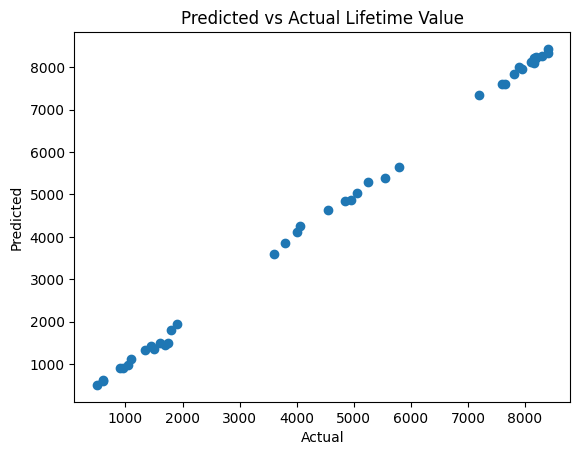

In [12]:
best_reg = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestRegressor(n_estimators=200))
])

best_reg.fit(X_train, y_train)
preds = best_reg.predict(X_test)

plt.scatter(y_test, preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Lifetime Value")
plt.show()
